In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as ns

In [2]:
df= pd.read_csv('hotel_bookings.csv')

In [89]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,tipo-adr
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15,tarifa_baja
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15,tarifa_baja
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15,tarifa_media
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15,tarifa_media
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/15,tarifa_alta


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_

- Se observan que están valores nulos en algunas columnas, no obstante estos no son determinantes para el análisis.

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
agent                             float64
company                           

## Análisis

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
corr= df.corr(method='spearman')

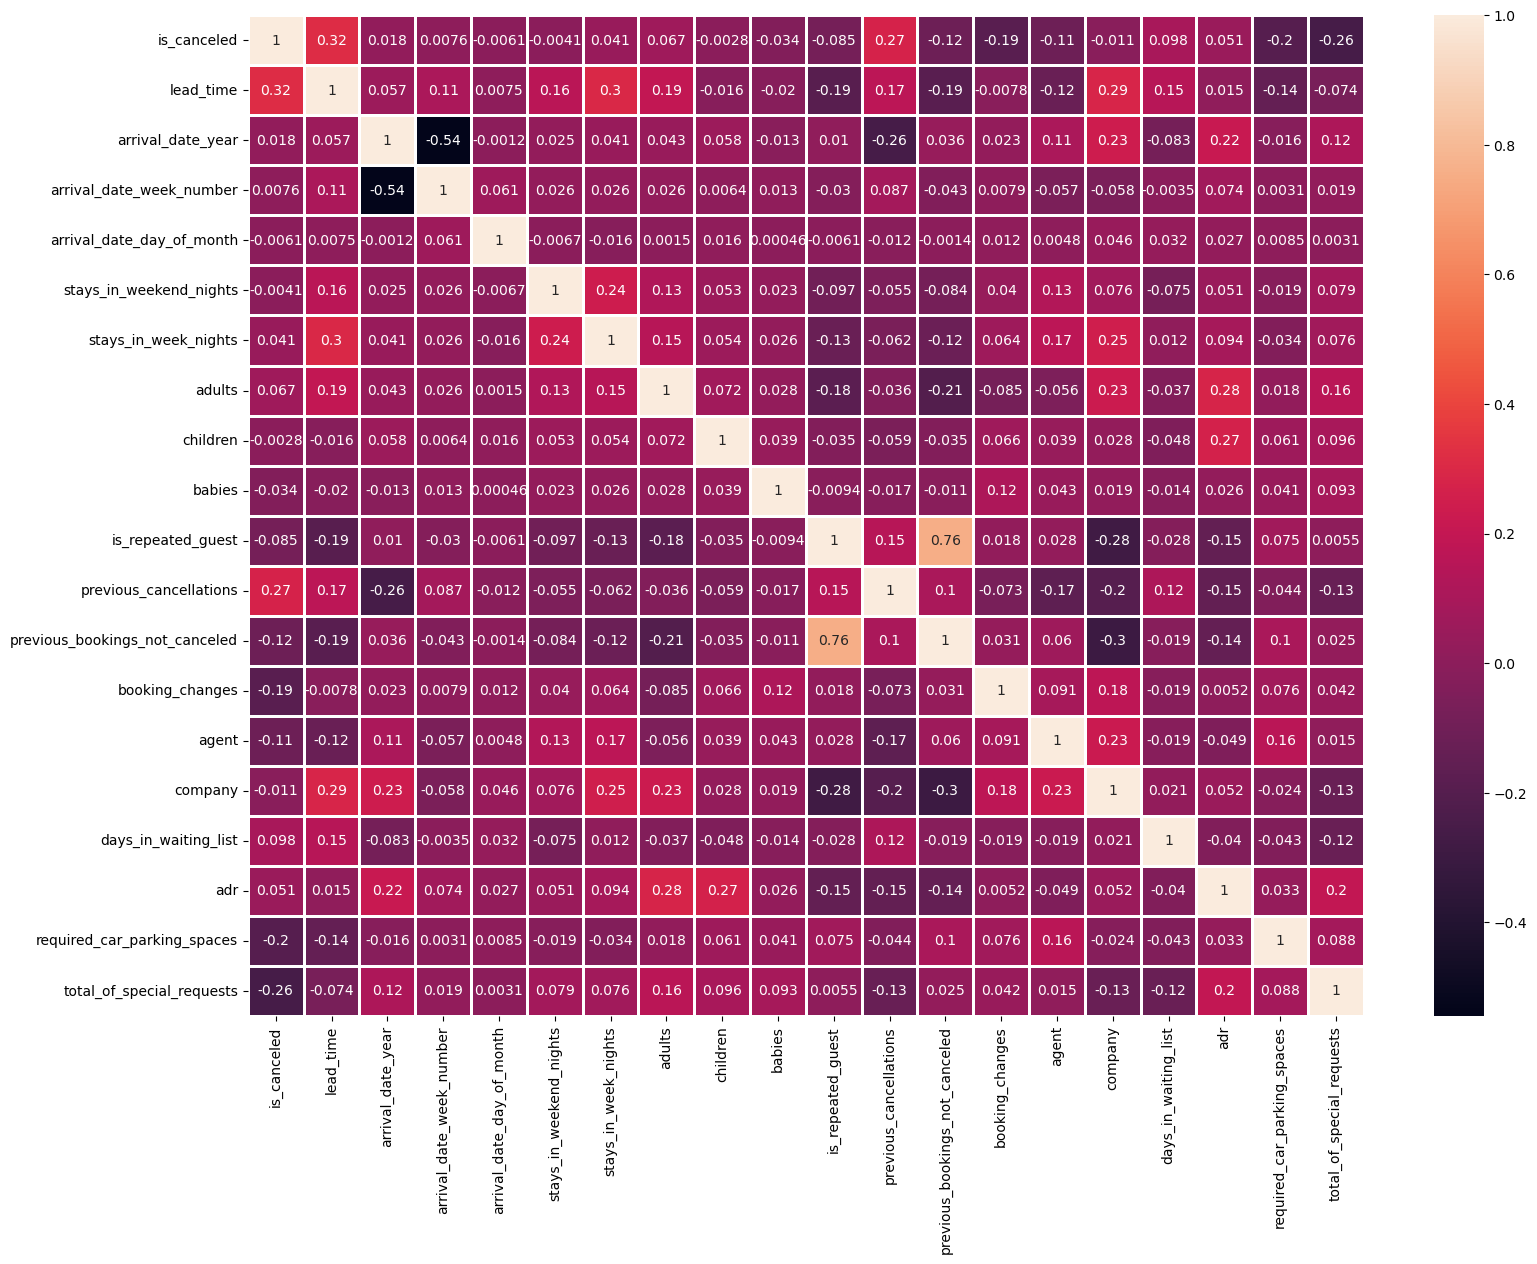

In [9]:
plt.figure(figsize= (18,13))
sns.heatmap(corr,annot=True, linewidth=1)

plt.show()

- agregar observación ....

In [24]:
estado_reservas= df['is_canceled'].value_counts()

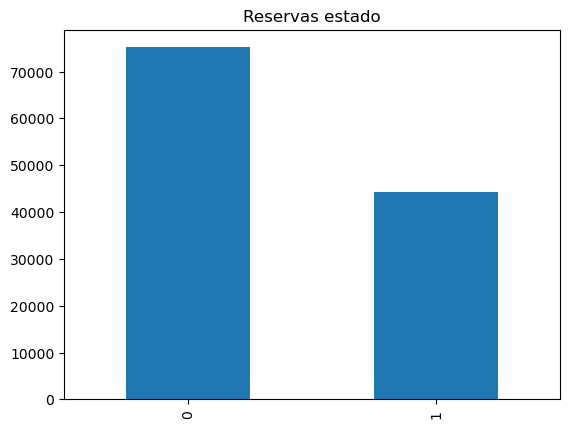

In [141]:
estado_reservas.plot(kind='bar')
plt.title('Reservas estado')
plt.show()

In [27]:
estado_reservas

0    75166
1    44224
Name: is_canceled, dtype: int64

In [12]:
no_cancelada= df[(df['is_canceled']==0)]

In [13]:
cancelada= df[(df['is_canceled']==1)]

In [74]:
adultos_nenes= cancelada.groupby(['adults','children'])[['total_of_special_requests']].count()

<AxesSubplot:xlabel='adults,children'>

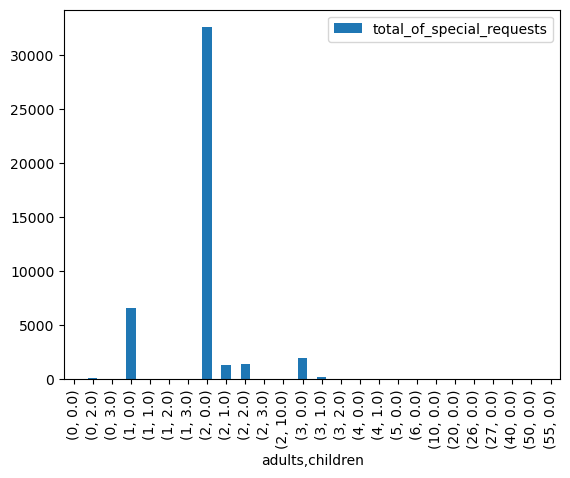

In [76]:
adultos_nenes.plot(kind='bar')

In [106]:
roomtype_cancelada = cancelada['meal'].value_counts()

<AxesSubplot:>

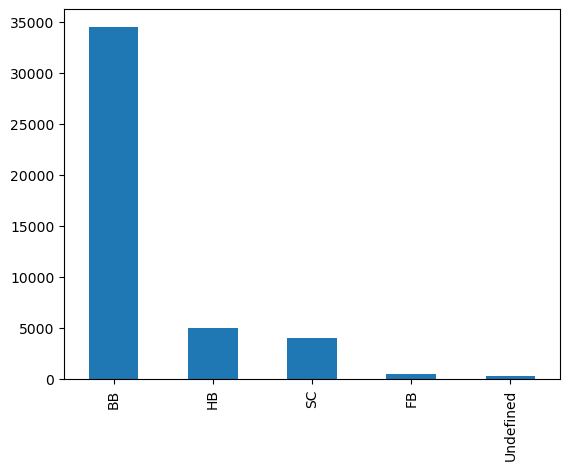

In [107]:
roomtype_cancelada.plot(kind='bar')

In [ ]:
cancelada['customer_type'].value_counts()

In [108]:
cancelada['market_segment'].value_counts()

Online TA        20739
Groups           12097
Offline TA/TO     8311
Direct            1934
Corporate          992
Complementary       97
Aviation            52
Undefined            2
Name: market_segment, dtype: int64

In [87]:
df['tipo-adr']=pd.qcut(df['adr'],q=4,labels=('tarifa_baja','tarifa_media','tarifa_alta','tarifa_muyalta'))

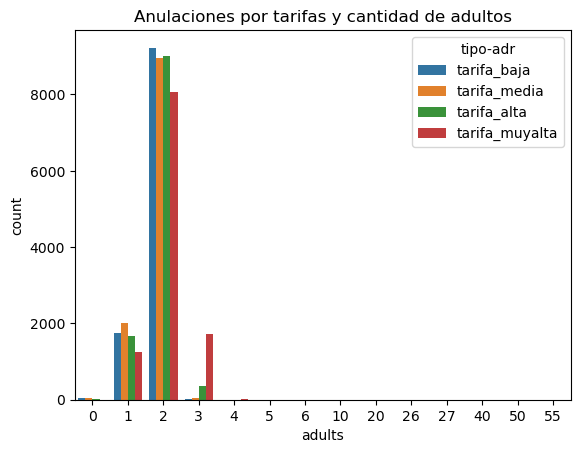

In [142]:
sns.countplot(data=cancelada,x='adults',hue='tipo-adr')
plt.title('Anulaciones por tarifas y cantidad de adultos')
plt.show()

<AxesSubplot:xlabel='meal', ylabel='count'>

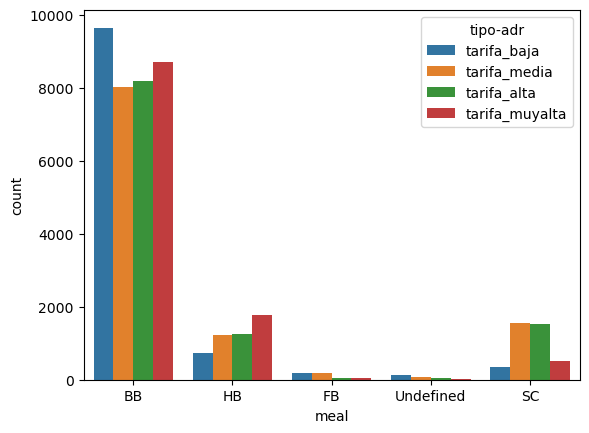

In [109]:
sns.countplot(data=cancelada,x='meal',hue='tipo-adr')

## Guía abreviaturas meal

- BB: Bed and Breakfast
- HB: Half Board
- FB: Full Board
- SC: Self Catering

In [105]:
df[(df['tipo-adr']=='tarifa_baja')].min()

C:\Users\gemas\AppData\Local\Temp\ipykernel_21528\1633163632.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[(df['tipo-adr']=='tarifa_baja')].min()


hotel                              City Hotel
is_canceled                                 0
lead_time                                   0
arrival_date_year                        2015
arrival_date_month                      April
arrival_date_week_number                    1
arrival_date_day_of_month                   1
stays_in_weekend_nights                     0
stays_in_week_nights                        0
adults                                      0
children                                  0.0
babies                                      0
meal                                       BB
market_segment                       Aviation
distribution_channel                Corporate
is_repeated_guest                           0
previous_cancellations                      0
previous_bookings_not_canceled              0
reserved_room_type                          A
assigned_room_type                          A
booking_changes                             0
agent                             

## Categoría tarifas ads

- tarifa-baja= -6,38€/ 69,3€
- tarifa-media= 69,3€/ 94,59€
- tarifa-alta= 94,59€/ 126€
- tarifa-muyalta= 126€/ 5400€

<AxesSubplot:xlabel='booking_changes', ylabel='count'>

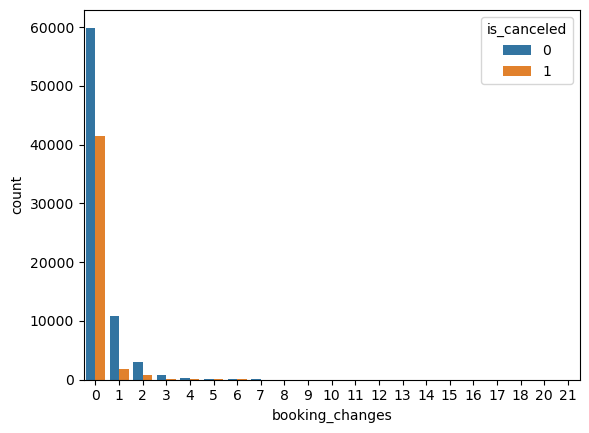

In [112]:
sns.countplot(data=df,x='booking_changes',hue='is_canceled')

In [125]:
adultos_nenes= df[(df['adults']>0)&(df['children']>0)&(df['is_canceled']==0)]

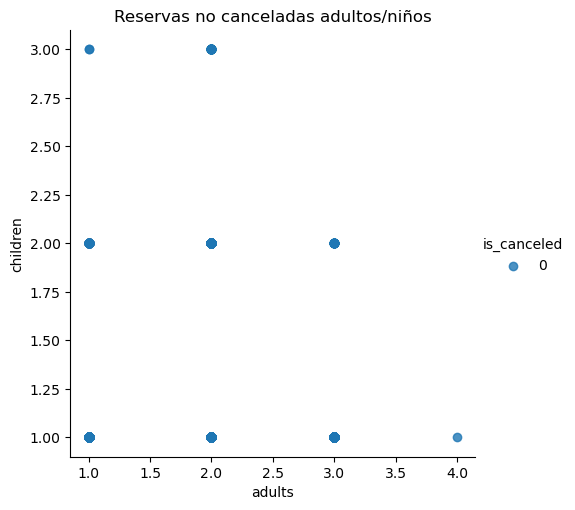

In [128]:
sns.lmplot(data=adultos_nenes,x='adults',y='children',hue='is_canceled',fit_reg=False)
plt.title('Reservas no canceladas adultos/niños')
plt.show()

In [132]:
adultos_nenes_cancelada= df[(df['adults']>0)&(df['children']>0)&(df['is_canceled']==1)]

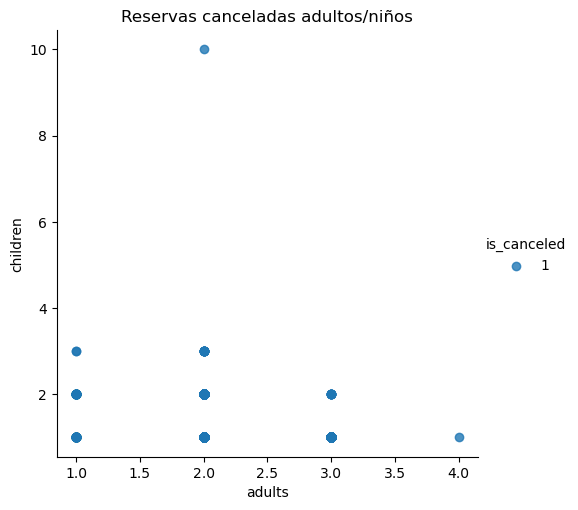

In [134]:
sns.lmplot(data=adultos_nenes_cancelada,x='adults',y='children',hue='is_canceled',fit_reg=False)
plt.title('Reservas canceladas adultos/niños')
plt.show()

In [137]:
cancelada.groupby('adults')['is_canceled'].count()

adults
0       109
1      6674
2     35258
3      2151
4        16
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: is_canceled, dtype: int64

In [139]:
cancelada.groupby(['adults','children'])['is_canceled'].count()

adults  children
0       0.0            25
        2.0            81
        3.0             3
1       0.0          6558
        1.0            65
        2.0            49
        3.0             2
2       0.0         32550
        1.0          1290
        2.0          1402
        3.0            12
        10.0            1
3       0.0          1930
        1.0           211
        2.0             9
4       0.0            15
        1.0             1
5       0.0             2
6       0.0             1
10      0.0             1
20      0.0             2
26      0.0             5
27      0.0             2
40      0.0             1
50      0.0             1
55      0.0             1
Name: is_canceled, dtype: int64

In [140]:
no_cancelada.groupby(['adults','children'])['is_canceled'].count()

adults  children
0       0.0           155
        1.0             4
        2.0           127
        3.0             8
1       0.0         16029
        1.0           214
        2.0           108
        3.0             2
2       0.0         49728
        1.0          2799
        2.0          1846
        3.0            49
3       0.0          3745
        1.0           276
        2.0            30
4       0.0            45
        1.0             1
Name: is_canceled, dtype: int64

In [138]:
no_cancelada.groupby('adults')['is_canceled'].count()

adults
0      294
1    16353
2    54422
3     4051
4       46
Name: is_canceled, dtype: int64

In [88]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'tipo-adr'],
      dtype='object')

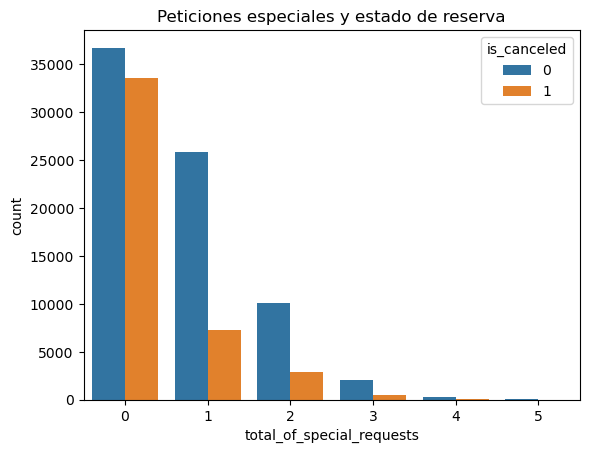

In [145]:
sns.countplot(data=df, x='total_of_special_requests',hue='is_canceled')
plt.title('Peticiones especiales y estado de reserva')
plt.show()

In [146]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [156]:
Changes= df.groupby(['distribution_channel','is_canceled'])[['is_canceled','booking_changes']].count()

<AxesSubplot:xlabel='booking_changes', ylabel='count'>

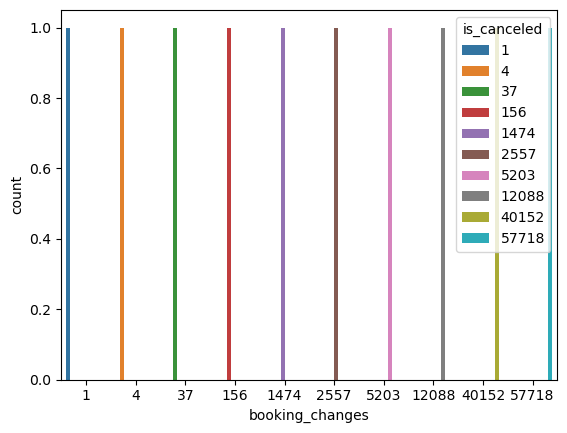

In [157]:
sns.countplot(data=Changes, x='booking_changes', hue='is_canceled')

In [1]:
df['is_canceled'].value_counts()

NameError: name 'df' is not defined